In [6]:
from torch import nn 
import torch 
from d2l import torch as d2l 

num_steps , batch_size = 35 , 32
train_iter , vocab = d2l.load_data_time_machine( batch_size , num_steps )

In [7]:
def get_params( vocab_size , num_hiddens , device ):
    num_inputs  = num_outputs = vocab_size
    def normal( shape ):
        return torch.randn( shape , device = device ) *0.01
    def tree():
        return(
            normal( (num_inputs , num_hiddens ) ),
            normal( (num_hiddens , num_hiddens  ) ),
            torch.zeros( num_hiddens , device = device )
        )
    w_xf , w_hf ,b_f = tree()
    w_xi , w_hi ,b_i = tree()
    w_xo , w_ho , b_o  = tree()
    w_xc , w_hc , b_c = tree()

    w_hy  = normal( ( num_hiddens , num_outputs ))
    b_y = torch.zeros( num_outputs , device = device  )
    # w_hc  = normal( ( num_hiddens , num_outputs ))
    # b_c = torch.zeros( num_outputs , device = device  )

    params = [w_xf , w_hf ,b_f  , w_xi , w_hi ,b_i ,w_xo , w_ho , b_o, w_xc , w_hc , b_c , w_hy , b_y   ]

    for param in params:
        param.requires_grad_( True )
    return params

In [8]:
def init_lstm_layer( batch_size , num_hiddens , device ):
    #第一个作为隐藏状态，第二个作为记忆单元
    return ( torch.zeros( batch_size , num_hiddens , device= device  ) , 
             torch.zeros( batch_size , num_hiddens , device = device  )  )

In [9]:
def lstm( inputs , states , params ):
    w_xf , w_hf ,b_f  , w_xi , w_hi ,b_i ,w_xo , w_ho , b_o, w_xc , w_hc , b_c , w_hy , b_y   = params
    (H , C_memory)   = states
    outputs = []
    for X in inputs:
        #vocab_size * num_hiddens
        F = torch.sigmoid( X@w_xf + H@w_hf + b_f )
        I = torch.sigmoid( X@w_xi + H@w_hi + b_i )
        O = torch.sigmoid( X@w_xo + H@w_ho + b_o )
        C = torch.tanh( X@w_xc + H@w_hc + b_c  )
        C_hat = C_memory*F + C*I
        H = O*torch.tanh( C_hat )
        y = H@w_hy + b_y
        outputs.append( y )

    return torch.cat( outputs , dim= 0 ) , ( H , C_hat , )
        

In [10]:
vocab_size , num_hiddens , device = len( vocab ) , 256 , d2l.try_gpu()
lr , num_epochs = 1 , 500
net = d2l.RNNModelScratch( vocab_size , num_hiddens , device , get_params , init_lstm_layer ,  lstm )
d2l.predict_ch8( 'time' , 20 , net , vocab , device )

'timeftmrybdwftmrybdwftmr'

perplexity 1.4, 6996.9 tokens/sec on cuda:0
time traveller three dimensions are passing a lact andensed by s
traveller thinkler and hedrd we call the time traveller thr


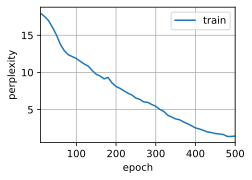

In [11]:
d2l.train_ch8( net , train_iter  ,vocab , lr , num_epochs , device )